In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import glob
import time
import cv2
import os

In [ ]:
#https://drive.google.com/file/d/12q7fPPb9Lb-cL2LJxn2d_dQGHto27PYT/view?usp=sharing
! wget "https://github.com/Jimut123/simply_junk/raw/main/models/classification_model_blood.h5"

--2021-05-04 18:39:03--  https://github.com/Jimut123/simply_junk/raw/main/models/classification_model_blood.h5
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jimut123/simply_junk/main/models/classification_model_blood.h5 [following]
--2021-05-04 18:39:03--  https://raw.githubusercontent.com/Jimut123/simply_junk/main/models/classification_model_blood.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29238824 (28M) [application/octet-stream]
Saving to: ‘classification_model_blood.h5’

classification_mode 100%[===================>]  27.88M   114MB/s    in 0.2s    

2021-05-04 18:39:04 (114 MB/s) 

In [11]:
import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten, \
                                    GlobalMaxPool2D, Dropout, SpatialDropout2D, add, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model

# m1_1, m1_2, l1_1, l1_2, m2_1, m2_2, l2_1, l2_2, m3_1, m3_2, m3_1, m3_2, l3_1, l3_2, m4_1, 

H, W, C = 360, 360, 3
N_LABELS = 8
D = 1
def Classification(H,W,C):
    
    input_layer = tf.keras.Input(shape=(H, W, C))

    m1_1 = BatchNormalization(axis=-1)(Conv2D(32, 3, activation='relu', strides=(1, 1), name="m1_1", padding='same')(input_layer))
    m1_2 = BatchNormalization(axis=-1)(Conv2D(32, 3, activation='relu', strides=(1, 1), name="m1_2", padding='same')(m1_1))
    m1_3 = MaxPool2D((2, 2))(BatchNormalization(axis=-1)(Conv2D(32, 3, activation='relu', strides=(1, 1), name="m1_3", padding='same')(m1_2)))

    l1_1 = BatchNormalization(axis=-1)(Conv2D(32, 3, activation='relu', strides=(1, 1), name="l1_1", padding='same')(m1_3))
    l1_2 = BatchNormalization(axis=-1)(Conv2D(32, 3, activation='relu', strides=(1, 1), name="l1_2", padding='same')(l1_1))
    l1_3 = MaxPool2D((2, 2))(BatchNormalization(axis=-1)(Conv2D(32, 3, activation='relu', strides=(1, 1), name="l1_3", padding='same')(l1_2)))

    m2_1 = BatchNormalization(axis=-1)(Conv2D(64, 3, activation='relu', strides=(1, 1), name="m2_1", padding='same')(l1_3))
    m2_2 = BatchNormalization(axis=-1)(Conv2D(64, 3, activation='relu', strides=(1, 1), name="m2_2", padding='same')(m2_1))
    m2_3 = MaxPool2D((2, 2))(BatchNormalization(axis=-1)(Conv2D(64, 3, activation='relu', strides=(1, 1), name="m2_3", padding='same')(m2_2)))

    l2_1 = BatchNormalization(axis=-1)(Conv2D(64, 3, activation='relu', strides=(1, 1), name="l2_1", padding='same')(m2_3))
    l2_2 = BatchNormalization(axis=-1)(Conv2D(64, 3, activation='relu', strides=(1, 1), name="l2_2", padding='same')(l2_1))
    l2_3 = MaxPool2D((2, 2))(BatchNormalization(axis=-1)(Conv2D(64, 3, activation='relu', strides=(1, 1), name="l2_3", padding='same')(l2_2)))


    m3_1 = BatchNormalization(axis=-1)(Conv2D(128, 3, activation='relu', strides=(1, 1), name="m3_1", padding='same')(l2_1))
    m3_2 = BatchNormalization(axis=-1)(Conv2D(128, 3, activation='relu', strides=(1, 1), name="m3_2", padding='same')(m3_1))
    m3_3 = MaxPool2D((2, 2))(BatchNormalization(axis=-1)(Conv2D(128, 3, activation='relu', strides=(1, 1), name="m3_3", padding='same')(m3_2)))

    l3_1 = BatchNormalization(axis=-1)(Conv2D(128, 3, activation='relu', strides=(1, 1), name="l3_1", padding='same')(m3_3))
    l3_2 = BatchNormalization(axis=-1)(Conv2D(128, 3, activation='relu', strides=(1, 1), name="l3_2", padding='same')(l3_1))
    l3_3 = MaxPool2D((2, 2))(BatchNormalization(axis=-1)(Conv2D(128, 3, activation='relu', strides=(1, 1), name="l3_3", padding='same')(l3_2)))

    m4_1 = BatchNormalization(axis=-1)(Conv2D(256, 3, activation='relu', strides=(2, 2), name="m4_1")(l3_3))
    m4_2 = BatchNormalization(axis=-1)(Conv2D(256, 3, activation='relu', strides=(2, 2), name="m4_2")(m4_1))
    # m4_3 = BatchNormalization(axis=-1)(Conv2D(512, 3, activation='relu', strides=(2, 2), name="m4_3")(m4_2))
    # m4_4 = BatchNormalization(axis=-1)(Conv2D(512, 3, activation='relu', strides=(2, 2), name="m4_4")(m4_3))


    #x = SpatialDropout2D(0.5, name="dropout_3")(m4_4)
    x = Flatten(name="flatten")(m4_2)
    x = Dense(512, activation='relu', name="dense_512")(x)
    x = Dense(N_LABELS, activation='softmax', name="output_layer")(x)

    model = tf.keras.models.Model(inputs=input_layer, outputs=x)
    return model


model = Classification(H,W,C)

opt = Adam(learning_rate=1e-5)

model.compile(optimizer=opt, 
              experimental_run_tf_function=False,
              loss='categorical_crossentropy',
              metrics= ['accuracy'])

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 360, 360, 3)]     0         
_________________________________________________________________
m1_1 (Conv2D)                (None, 360, 360, 32)      896       
_________________________________________________________________
batch_normalization_20 (Batc (None, 360, 360, 32)      128       
_________________________________________________________________
m1_2 (Conv2D)                (None, 360, 360, 32)      9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 360, 360, 32)      128       
_________________________________________________________________
m1_3 (Conv2D)                (None, 360, 360, 32)      9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 360, 360, 32)      128 

In [12]:
from tensorflow import keras
model = keras.models.load_model('classification_model_blood.h5')

In [13]:
# https://www.kaggle.com/anktplwl91/visualizing-what-your-convnet-learns

# The purpose of this function is to just convert a numpy array to a standard image format, so that it can be displayed and viewed comfortably
def deprocess_image(x):
    
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')

    return x

In [14]:
# This function is used to create a loss function that maximizes the value of a given filter in a convolution layer, and then we use SGD to adjust the values of the
# input image so as to maximize this activation value. We pass the layer name and the filter index to the function as arguments. 'loss' is the mean for that particular
# filter, 'grads' is the gradient calculated for this loss with respect to input image. Finally, SGD is run for 80 iterations which continuously maximizes the response
# to input image by adding the gradient. Finally, it uses 'deprocess_image' to convert this array to a representable image format.

def generate_pattern(layer_name, filter_index, size=150):
    
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(80):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)


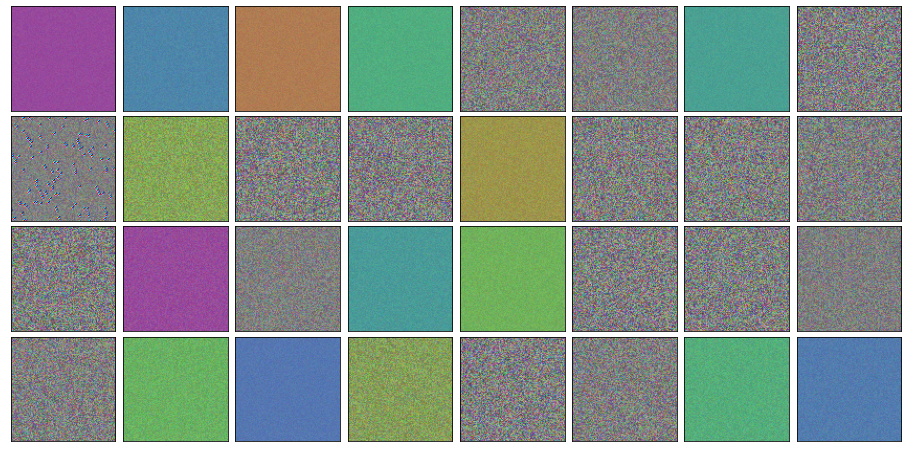

In [25]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions

%matplotlib inline

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

# Below are the patterns to which the filters from first convolution layer get activated. As we can see these are very basic cross-sectional patterns formed by
# horizontal and vertical lines, which is what the these filters look in the input image and get activated if they find one.
fig = plt.figure(figsize=(16, 8))
for img in range(32):
    ax = fig.add_subplot(4, 8, img+1)
    ax = plt.imshow(generate_pattern('m1_1', img))
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)


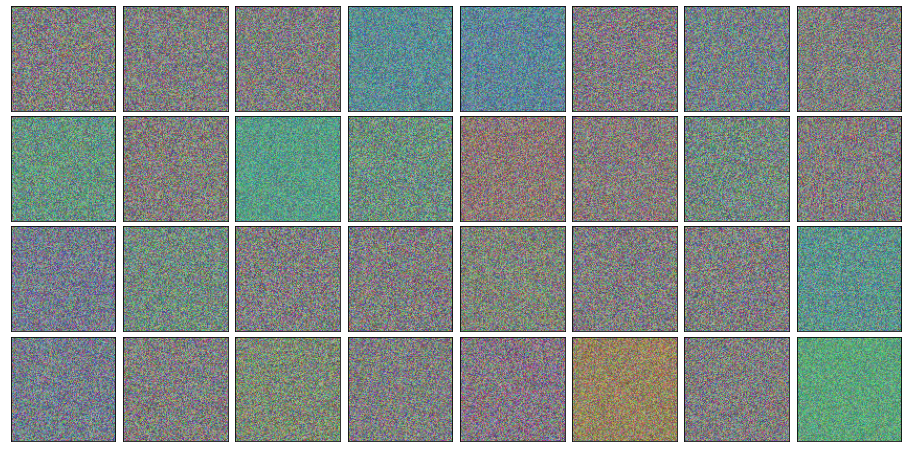

In [26]:
# m1_2
# Below are the patterns to which the filters from first convolution layer get activated. As we can see these are very basic cross-sectional patterns formed by
# horizontal and vertical lines, which is what the these filters look in the input image and get activated if they find one.
fig = plt.figure(figsize=(16, 8))
for img in range(32):
    ax = fig.add_subplot(4, 8, img+1)
    ax = plt.imshow(generate_pattern('m1_2', img))
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)


In [ ]:
# m1_2
# Below are the patterns to which the filters from first convolution layer get activated. As we can see these are very basic cross-sectional patterns formed by
# horizontal and vertical lines, which is what the these filters look in the input image and get activated if they find one.
fig = plt.figure(figsize=(16, 16))
for img in range(256):
    ax = fig.add_subplot(16, 16, img+1)
    ax = plt.imshow(generate_pattern('m4_1', img))
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)


In [ ]:
# https://keras.io/examples/vision/visualizing_what_convnets_learn/

In [16]:
# 'm1_1', 'm1_2', 'l1_1', 'l1_2', 'm2_1', 'm2_2', 'l2_1', 'l2_2', 'm3_1', 'm3_2', 'm3_1', 'm3_2', 'l3_1', 'l3_2', 'm4_1', 'm4_2'

import numpy as np
import tensorflow as tf
from tensorflow import keras

# The dimensions of our input image
img_width = 360
img_height = 360
# Our target layer: we will visualize the filters from this layer.
# See `model.summary()` for list of layer names, if you want to change this.
layer_name = "m2_2"


In [17]:
# Set up a model that returns the activation values for our target layer
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.inputs, outputs=layer.output)

In [18]:
def compute_loss(input_image, filter_index):
    activation = feature_extractor(input_image)
    # We avoid border artifacts by only involving non-border pixels in the loss.
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)


In [19]:
@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img


In [20]:
def initialize_image():
    # We start from a gray image with some random noise
    img = tf.random.uniform((1, img_width, img_height, 3))
    # ResNet50V2 expects inputs in the range [-1, +1].
    # Here we scale our random inputs to [-0.125, +0.125]
    return (img - 0.5) * 0.25


def visualize_filter(filter_index):
    # We run gradient ascent for 20 steps
    iterations = 30
    learning_rate = 10.0
    img = initialize_image()
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_rate)

    # Decode the resulting input image
    img = deprocess_image(img[0].numpy())
    return loss, img


def deprocess_image(img):
    # Normalize array: center on 0., ensure variance is 0.15
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # Center crop
    img = img[25:-25, 25:-25, :]

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img


In [21]:
from IPython.display import Image, display
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

loss, img = visualize_filter(0)
keras.preprocessing.image.save_img("0.png", img)


Instructions for updating:
non-resource variables are not supported in the long term


AttributeError: ignored

In [ ]:
! pip install keras-vis

In [22]:
from keras.applications import VGG16

from vis.losses import ActivationMaximization
from vis.regularizers import TotalVariation, LPNorm
from vis.input_modifiers import Jitter
from vis.optimizer import Optimizer
from vis.callbacks import GifGenerator

import tensorflow.compat.v2.feature_column as fc

# Build the VGG16 network with ImageNet weights
#model = VGG16(weights='imagenet', include_top=True)
print('Model loaded.')

# The name of the layer we want to visualize
# (see model definition in vggnet.py)
layer_name = 'm2_2'
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
output_class = [1]

losses = [
    (ActivationMaximization(layer_dict[layer_name], output_class), 2),
    (LPNorm(model.input), 10),
    (TotalVariation(model.input), 10)
]
opt = Optimizer(model.input, losses)
opt.minimize(max_iter=500, verbose=True, input_modifiers=[Jitter()], callbacks=[GifGenerator('opt_progress')])

Model loaded.


InvalidArgumentError: ignored